In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv( "data/donnees_preprocesse_pour_modelisation.csv", sep=",")

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temps moyen entre les vagues,17497.0,6.976560,1.949652,3.007394,5.336574,6.744879e+00,8.336771,12.794645
Direction moyenne des vagues,17497.0,0.383601,0.325958,-0.962609,0.242460,4.592439e-01,0.616361,0.940346
Période des vagues énergétiques,17497.0,11.096219,2.155595,4.502103,9.387197,1.114274e+01,12.766678,17.357317
Hauteur moyenne des vagues les plus hautes,17497.0,1.312141,0.656746,0.326232,0.881588,1.125568e+00,1.582914,4.445147
temps_moyen_entre_les_vagues_2016_2017_1129,17497.0,7.218073,1.944023,3.298572,5.577109,6.981496e+00,8.607282,13.137815
direction_moyene_des_vagues_2016_2017_1129,17497.0,0.452985,0.314452,-0.948593,0.333773,5.282766e-01,0.674270,0.993520
temps_moyen_entre_les_vagues_energetiques_2016_2017_1129,17497.0,11.153017,2.142648,4.646813,9.495382,1.122081e+01,12.786056,17.253552
hauteur_moyenne_du_tier_des_vagues_les_plus_hautes_2016_2017_1129,17497.0,1.574763,0.757092,0.396054,1.067302,1.370914e+00,1.899515,5.366242
temps_moyen_entre_les_vagues_2016_2017_1118,17497.0,7.123342,1.903717,3.154718,5.536334,6.874739e+00,8.471741,13.005015
direction_moyene_des_vagues_2016_2017_1118,17497.0,0.465018,0.330890,-0.984702,0.338696,5.471984e-01,0.700632,1.011016


In [13]:
# Trier les données par index temporel 
series_data = data.sort_index()

# Séparer les features et la target 
features = series_data.drop(columns=["Hauteur moyenne des vagues les plus hautes_target", "Hauteur moyenne des vagues les plus hautes","hour"])
target = series_data["Hauteur moyenne des vagues les plus hautes_target"]

# Taille totale des données
total_size = len(series_data)

# Proportions pour train, validation, et test
train_ratio = 0.7  # 70 % pour l'entraînement
val_ratio = 0.15   # 15 % pour la validation
test_ratio = 0.15  # 15 % pour le test

# Calcul des indices pour découpage
train_end = int(total_size * train_ratio)
val_end = int(total_size * (train_ratio + val_ratio))

# Découpage en ensembles temporels
X_train, y_train = features.iloc[:train_end], target.iloc[:train_end]
X_val, y_val = features.iloc[train_end:val_end], target.iloc[train_end:val_end]
X_test, y_test = features.iloc[val_end:], target.iloc[val_end:]

# Vérification des splits
print(f"Train: {len(X_train)} observations")
print(f"Validation: {len(X_val)} observations")
print(f"Test: {len(X_test)} observations")

# Vérification des indices pour s'assurer du bon découpage temporel
print("Train index range:", X_train.index.min(), "-", X_train.index.max())
print("Validation index range:", X_val.index.min(), "-", X_val.index.max())
print("Test index range:", X_test.index.min(), "-", X_test.index.max())


Train: 12247 observations
Validation: 2625 observations
Test: 2625 observations
Train index range: 0 - 12246
Validation index range: 12247 - 14871
Test index range: 14872 - 17496


In [14]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Initialisation du modèle XGBoost
model = xgb.XGBRegressor(
    objective="reg:squarederror",  
    n_estimators=500,              
    learning_rate=0.01,            
    max_depth=6,                   
    subsample=0.8,                 
    random_state=42
)

# Entraînement sur Train et Validation
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=1
)

# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred,))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


[0]	validation_0-rmse:0.51760
[1]	validation_0-rmse:0.51354
[2]	validation_0-rmse:0.50946
[3]	validation_0-rmse:0.50533
[4]	validation_0-rmse:0.50132
[5]	validation_0-rmse:0.49732
[6]	validation_0-rmse:0.49347
[7]	validation_0-rmse:0.48959
[8]	validation_0-rmse:0.48602
[9]	validation_0-rmse:0.48209
[10]	validation_0-rmse:0.47832
[11]	validation_0-rmse:0.47500
[12]	validation_0-rmse:0.47131
[13]	validation_0-rmse:0.46792
[14]	validation_0-rmse:0.46452
[15]	validation_0-rmse:0.46110
[16]	validation_0-rmse:0.45764
[17]	validation_0-rmse:0.45405
[18]	validation_0-rmse:0.45076
[19]	validation_0-rmse:0.44720
[20]	validation_0-rmse:0.44399
[21]	validation_0-rmse:0.44088
[22]	validation_0-rmse:0.43764
[23]	validation_0-rmse:0.43432
[24]	validation_0-rmse:0.43121
[25]	validation_0-rmse:0.42809
[26]	validation_0-rmse:0.42506
[27]	validation_0-rmse:0.42219
[28]	validation_0-rmse:0.41929
[29]	validation_0-rmse:0.41632
[30]	validation_0-rmse:0.41344
[31]	validation_0-rmse:0.41064
[32]	validation_0-

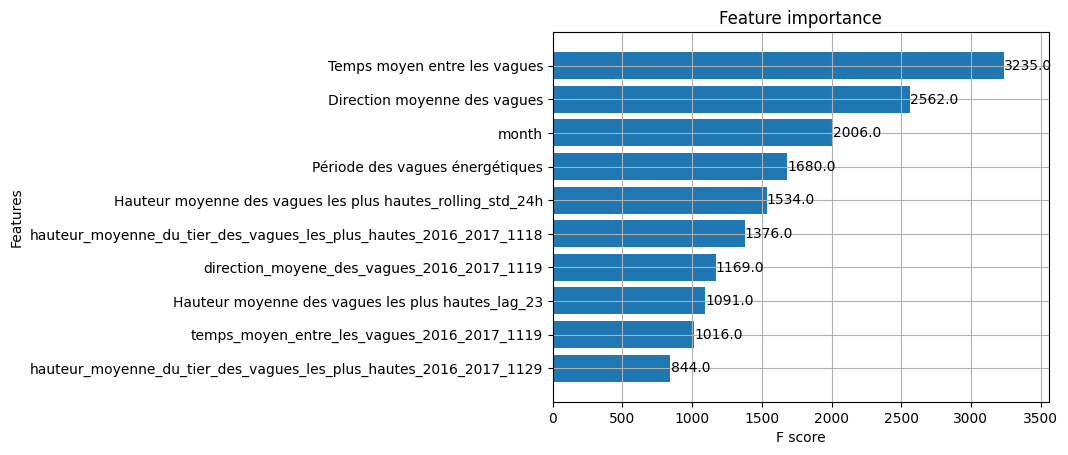

In [7]:
# Importance des variables
xgb.plot_importance(model, height=0.8, max_num_features=10)
plt.show()


In [8]:
import shap

/Users/maro/series_temporelles/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Initialiser l'explainer SHAP
explainer = shap.Explainer(model, X_train)

# Calcul des SHAP values pour l'ensemble de test
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
# LSTM

In [2]:
import numpy as np

In [8]:
def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(window_size, len(features)):
        X.append(features.iloc[i-window_size:i].values)  # Les `window_size` dernières observations
        y.append(target.iloc[i])  # La cible correspondante à chaque séquence
    return np.array(X), np.array(y)

# Choisir la taille de la fenêtre (par exemple 7 jours en heure ça donne 168)
window_size = 168

# Création des séquences sur les ensembles train, validation, et test
X_train_seq, y_train_seq = create_sequences(X_train, y_train, window_size)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, window_size)


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Instancier le scaler
scaler = MinMaxScaler()

# Appliquer le scaler aux features
X_train_scaled = scaler.fit_transform(X_train_seq.reshape(-1, X_train_seq.shape[-1]))
X_val_scaled = scaler.transform(X_val_seq.reshape(-1, X_val_seq.shape[-1]))
X_test_scaled = scaler.transform(X_test_seq.reshape(-1, X_test_seq.shape[-1]))

# Reshaper les données à la forme (n_samples, time_steps, n_features)
X_train_scaled = X_train_scaled.reshape(X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2])
X_val_scaled = X_val_scaled.reshape(X_val_seq.shape[0], X_val_seq.shape[1], X_val_seq.shape[2])
X_test_scaled = X_test_scaled.reshape(X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2])


In [15]:
pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.6-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.meta

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


2025-02-06 03:44:55.491610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Modèle LSTM
model = Sequential()

# Première couche LSTM
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))

# Ajouter une couche Dropout pour éviter l'overfitting
model.add(Dropout(0.2))

# Couche Dense pour la prédiction
model.add(Dense(units=1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


/Users/maro/series_temporelles/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        19,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,051 (74.42 KB)

 Trainable params: 19,051 (74.42 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Entraîner le modèle
history = model.fit(
    X_train_scaled, y_train_seq,
    epochs=20,  # Nombre d'époques
    batch_size=32,  # Taille du lot
    validation_data=(X_val_scaled, y_val_seq),
    verbose=1
)


Epoch 1/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 74s 166ms/step - loss: 0.3821 - val_loss: 0.0427
Epoch 2/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - loss: 0.1912 - val_loss: 0.0363
Epoch 3/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - loss: 0.1642 - val_loss: 0.0298
Epoch 4/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - loss: 0.1394 - val_loss: 0.0361
Epoch 5/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - loss: 0.1303 - val_loss: 0.0292
Epoch 6/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - loss: 0.1240 - val_loss: 0.0285
Epoch 7/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - loss: 0.1089 - val_loss: 0.0273
Epoch 8/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - loss: 0.1014 - val_loss: 0.0282
Epoch 9/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - loss: 0.0961 - val_loss: 0.0341
Epoch 10/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - loss: 0.0915 - val_loss: 0.0259
Epoch 11/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - loss: 0.0883 - val_loss: 0.0322
Epoch 12/20
378/378

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Jeu de  test
y_pred = model.predict(X_test_scaled)

# Métriques 
mae = mean_absolute_error(y_test_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
MAE: 0.2536
RMSE: 0.3433
